In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# for geoplotting
import geopandas as gpd
import geoplot as gpl
import geoplot.crs as gcrs
from shapely.geometry import Point

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

#from statsforecast import StatsForecast

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [3]:
df.shape

(79023, 76)

In [4]:
# Unique values of latitudes and longitudes
print("latitudes:", len(set(df["latitude"])), "longitudes:", len(set(df["longitude"])))

latitudes: 452 longitudes: 453


In [5]:
# Checking the number of unique locations in the data set
unique_latlongs = df.drop_duplicates(subset = ["latitude", "longitude"])
print(unique_latlongs.iloc[:, :4])

print("Total rows of data=", len(unique_latlongs) * 159)

           ID_LAT_LON_YEAR_WEEK  latitude  longitude  year
0      ID_-0.510_29.290_2019_00    -0.510     29.290  2019
159    ID_-0.528_29.472_2019_00    -0.528     29.472  2019
318    ID_-0.547_29.653_2019_00    -0.547     29.653  2019
477    ID_-0.569_30.031_2019_00    -0.569     30.031  2019
636    ID_-0.598_29.102_2019_00    -0.598     29.102  2019
...                         ...       ...        ...   ...
78228  ID_-3.153_30.347_2019_00    -3.153     30.347  2019
78387  ID_-3.161_28.839_2019_00    -3.161     28.839  2019
78546  ID_-3.174_29.926_2019_00    -3.174     29.926  2019
78705  ID_-3.287_29.713_2019_00    -3.287     29.713  2019
78864  ID_-3.299_30.301_2019_00    -3.299     30.301  2019

[497 rows x 4 columns]
Total rows of data= 79023


In [6]:
# Make a location column in this form: "latitude_longitude"
df["location_id"] = df["latitude"].astype(str) + '  ' + df["longitude"].astype(str)

In [7]:
# Missing values per column
na_counts = df.isna().sum()
for index, count in na_counts.items():
    print(index, count)

ID_LAT_LON_YEAR_WEEK 0
latitude 0
longitude 0
year 0
week_no 0
SulphurDioxide_SO2_column_number_density 14609
SulphurDioxide_SO2_column_number_density_amf 14609
SulphurDioxide_SO2_slant_column_number_density 14609
SulphurDioxide_cloud_fraction 14609
SulphurDioxide_sensor_azimuth_angle 14609
SulphurDioxide_sensor_zenith_angle 14609
SulphurDioxide_solar_azimuth_angle 14609
SulphurDioxide_solar_zenith_angle 14609
SulphurDioxide_SO2_column_number_density_15km 14609
CarbonMonoxide_CO_column_number_density 2122
CarbonMonoxide_H2O_column_number_density 2122
CarbonMonoxide_cloud_height 2122
CarbonMonoxide_sensor_altitude 2122
CarbonMonoxide_sensor_azimuth_angle 2122
CarbonMonoxide_sensor_zenith_angle 2122
CarbonMonoxide_solar_azimuth_angle 2122
CarbonMonoxide_solar_zenith_angle 2122
NitrogenDioxide_NO2_column_number_density 18320
NitrogenDioxide_tropospheric_NO2_column_number_density 18320
NitrogenDioxide_stratospheric_NO2_column_number_density 18320
NitrogenDioxide_NO2_slant_column_number_den

#### Emissions EDA

In [8]:
print("Range of emission values")
print("Emission min:", df["emission"].min())
print("Emission max:", df["emission"].max())

Range of emission values
Emission min: 0.0
Emission max: 3167.768


In [9]:
df["emission"].describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

In [10]:
# High emission indices
high_emissions_df = df.loc[df["emission"] > 2000]
high_emissions_df.head(60)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location_id
46587,ID_-2.079_29.321_2019_00,-2.079,29.321,2019,0,NaN,NaN,NaN,NaN,NaN,...,68139.833964,1856.415641,32.131939,0.239269,-41.171539,29.888111,-133.322392,31.588696,2778.1920,-2.079 29.321
46588,ID_-2.079_29.321_2019_01,-2.079,29.321,2019,1,NaN,NaN,NaN,NaN,NaN,...,58517.607479,2926.521405,34.762639,0.253798,44.984207,40.190883,-143.739903,25.914405,2950.9507,-2.079 29.321
46589,ID_-2.079_29.321_2019_02,-2.079,29.321,2019,2,0.000159,0.741044,0.000118,0.077346,-98.683156,...,53755.163592,3443.213782,19.929754,0.261905,15.449158,30.402736,-140.554126,25.307976,3093.1740,-2.079 29.321
46590,ID_-2.079_29.321_2019_03,-2.079,29.321,2019,3,0.000322,0.682432,0.000215,0.168179,-13.240126,...,47789.731655,4831.351318,15.753355,0.265051,-12.708137,37.690640,-135.281579,26.302885,3136.0488,-2.079 29.321
46591,ID_-2.079_29.321_2019_04,-2.079,29.321,2019,4,0.000042,0.779578,0.000029,0.106102,15.632729,...,55349.706102,3230.417142,8.344532,0.261588,73.571106,46.080676,-142.490367,19.759141,3131.8489,-2.079 29.321
46592,ID_-2.079_29.321_2019_05,-2.079,29.321,2019,5,-0.000024,0.722607,-0.000021,0.122191,-55.443980,...,50528.287051,4074.340447,10.763899,0.269940,30.211407,36.954013,-134.640866,20.354112,3167.7680,-2.079 29.321
46593,ID_-2.079_29.321_2019_06,-2.079,29.321,2019,6,-0.000077,0.763165,-0.000057,0.045423,15.816516,...,47514.268354,4638.462923,26.505841,0.264941,-11.956453,28.159291,-120.792826,23.785329,3112.7644,-2.079 29.321
46594,ID_-2.079_29.321_2019_07,-2.079,29.321,2019,7,-0.000145,0.767676,-0.000111,0.298395,73.658966,...,46688.400745,4643.222299,21.132313,0.242241,5.613165,26.322330,-115.202476,21.829456,3128.4414,-2.079 29.321
46595,ID_-2.079_29.321_2019_08,-2.079,29.321,2019,8,0.000075,0.721732,0.000059,0.141324,-70.213324,...,59614.651459,2666.412027,22.817905,0.274204,-49.855416,37.956675,-109.660632,23.083674,3136.6560,-2.079 29.321
46640,ID_-2.079_29.321_2020_00,-2.079,29.321,2020,0,-0.000019,0.901467,-0.000015,0.135616,-100.677452,...,63949.449714,3927.710586,8.980786,0.273905,-42.021438,27.264902,-135.228995,30.755242,2710.7104,-2.079 29.321


In [11]:
# Emission max index
df.loc[df["emission"] == df["emission"].max()]

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location_id
46592,ID_-2.079_29.321_2019_05,-2.079,29.321,2019,5,-0.000024,0.722607,-0.000021,0.122191,-55.44398,...,50528.287051,4074.340447,10.763899,0.26994,30.211407,36.954013,-134.640866,20.354112,3167.768,-2.079 29.321


In [12]:
# Emission min indices
min_emissions_df = df.loc[df["emission"] == df["emission"].min()]
min_emissions_df["year"].value_counts()

year
2019    795
2020    795
2021    795
Name: count, dtype: int64

In [13]:
min_emissions_df["location_id"].value_counts()

location_id
-1.328  28.872    159
-1.505  30.995    159
-1.532  28.568    159
-1.682  29.218    159
-1.696  28.304    159
-1.712  28.688    159
-1.73  28.47      159
-1.833  28.467    159
-1.839  28.761    159
-1.974  28.526    159
-2.496  28.504    159
-2.817  29.283    159
-2.841  29.159    159
-2.859  29.041    159
-2.898  29.002    159
Name: count, dtype: int64

#### There are 15 locations where carbon emission is 0 for all 53 weeks in each year: 2019, 2020, 2021. 

In [14]:
# I need to plot emissions to look for seasonality and trend. But how to do that with two dimensional data?
# plt.plot(df["emission"])

<Axes: xlabel='week_no', ylabel='emission'>

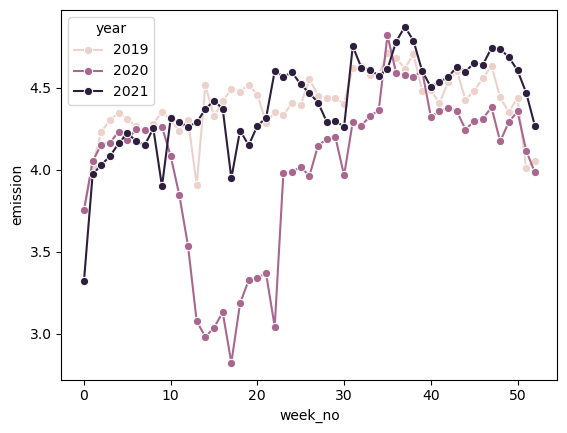

In [15]:
# Approach 1: Plotting emissions by location (will need to make 497 plots)
small_df = df.head(159)
sns.lineplot(data = small_df, x = "week_no", y = "emission", hue = "year", marker="o")

In [16]:
# Approach 2: Take the average emission per year_week for each location
avg_emissions_by_year_week = df.groupby(["year", "week_no"])["emission"].mean()
avg_emissions_by_year_week = pd.DataFrame(avg_emissions_by_year_week)
avg_emissions_by_year_week = avg_emissions_by_year_week.reset_index() # reset the index to extract year and week_no as named columns in the df
avg_emissions_by_year_week.head(10)

,year,week_no,emission
0,2019,0,76.739149
1,2019,1,82.376350
2,2019,2,86.008823
3,2019,3,87.903964
4,2019,4,89.595095
5,2019,5,88.912221
6,2019,6,88.946225
7,2019,7,87.610861
8,2019,8,88.452825
9,2019,9,85.506757


<Axes: xlabel='week_no', ylabel='emission'>

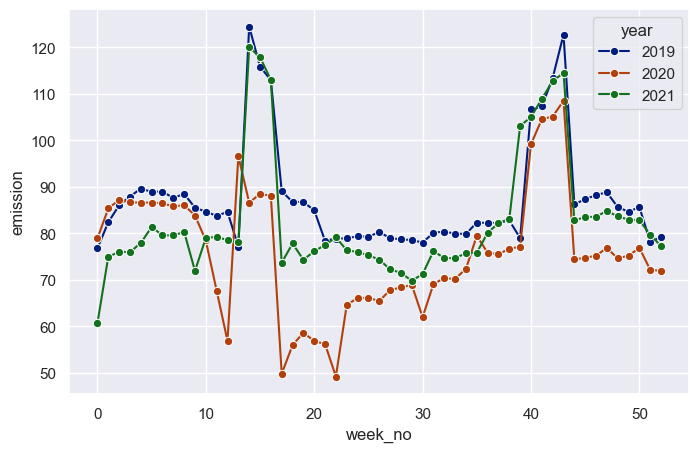

In [17]:
#define figure size
sns.set_theme(rc={'figure.figsize':(8, 5)}) 
sns.lineplot(data = avg_emissions_by_year_week, x = "week_no", y = "emission", hue = "year", palette='dark', marker="o")

It looks like there is some seasonality in emission because emissions tend to be high between weeks 10 and 20, and between weeks ~38 and 45. The time series data does not seem to be trending because for all three years, emission levels have mostly stayed between 60 and 90 units, with the exception of the historic low in 2020 and the peaks in between weeks 10-20 and weeks ~38-45.

#### Find correlation

In [18]:
correlation_subsetdf = df.iloc[:, 1:(len(df.columns)-1)].corr()

In [19]:
# Ten variables that are most highly correlated with emission
top10_corrs = abs(correlation_subsetdf['emission']).sort_values(ascending = False).head(10)
top10_corrs

emission                                                    1.000000
longitude                                                   0.102746
UvAerosolLayerHeight_aerosol_height                         0.069008
UvAerosolLayerHeight_aerosol_pressure                       0.068138
Cloud_surface_albedo                                        0.046587
CarbonMonoxide_H2O_column_number_density                    0.043217
CarbonMonoxide_CO_column_number_density                     0.041328
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.040263
UvAerosolLayerHeight_aerosol_optical_depth                  0.040156
UvAerosolLayerHeight_sensor_azimuth_angle                   0.035142
Name: emission, dtype: float64

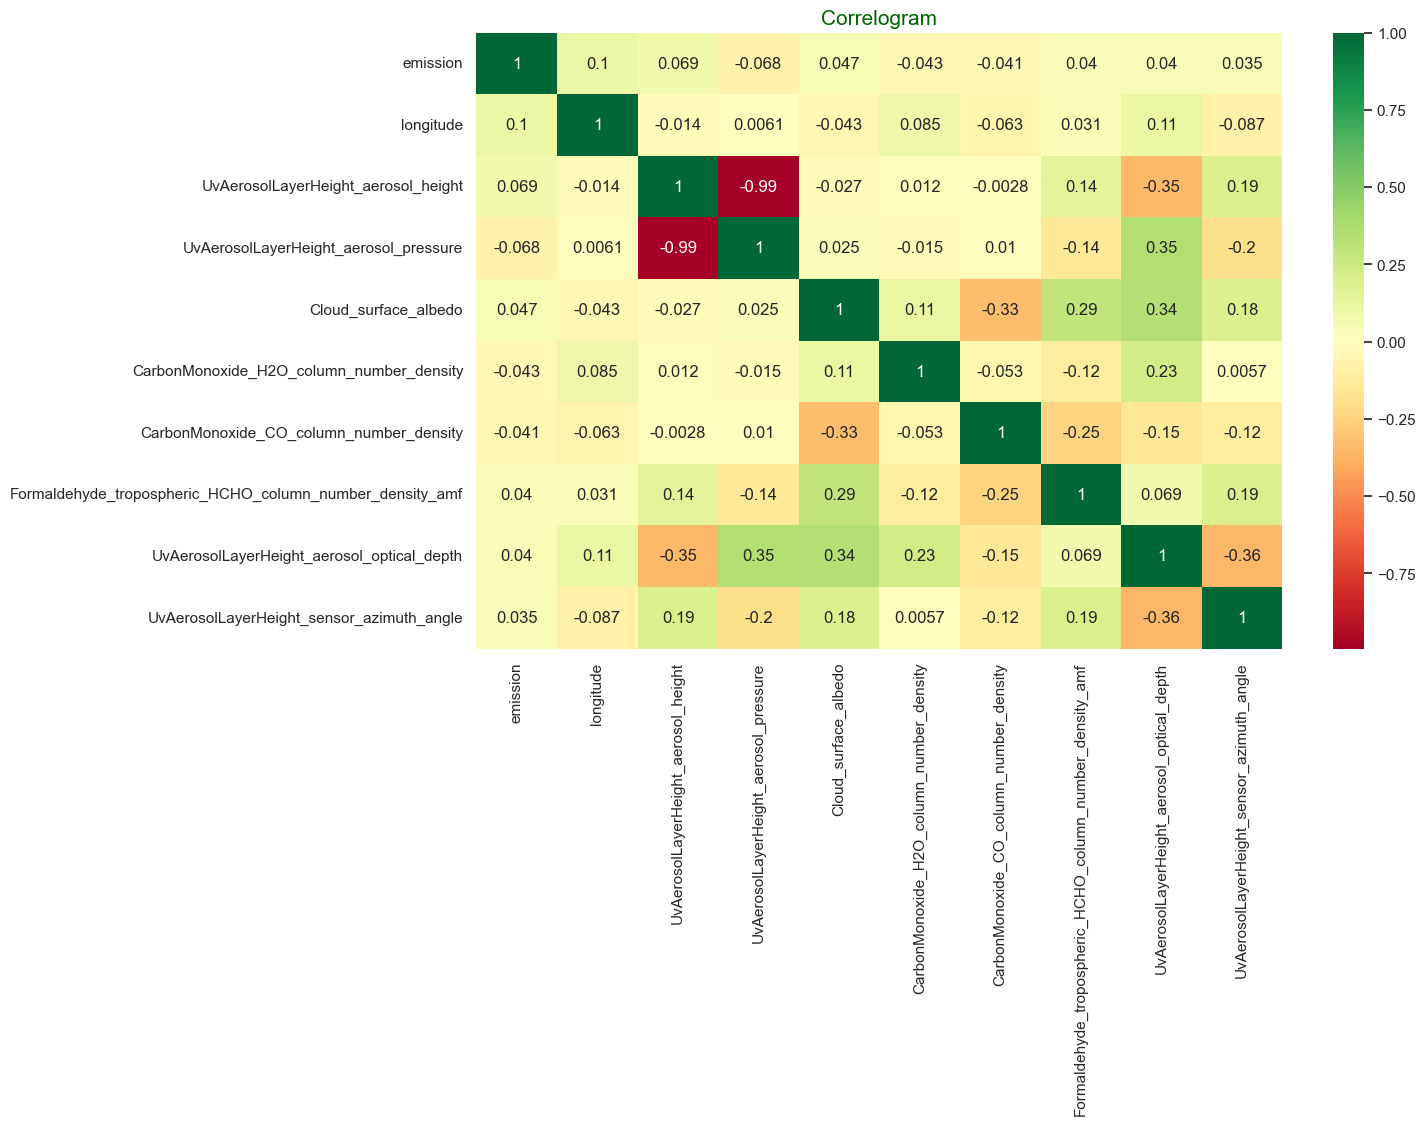

In [20]:
# Create a heatmap displaying correlation between features
corr = df[list(top10_corrs.index)].corr() 
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

We do not see a lot of correlation among features that have the highest correlation to emission. 

#### Modeling

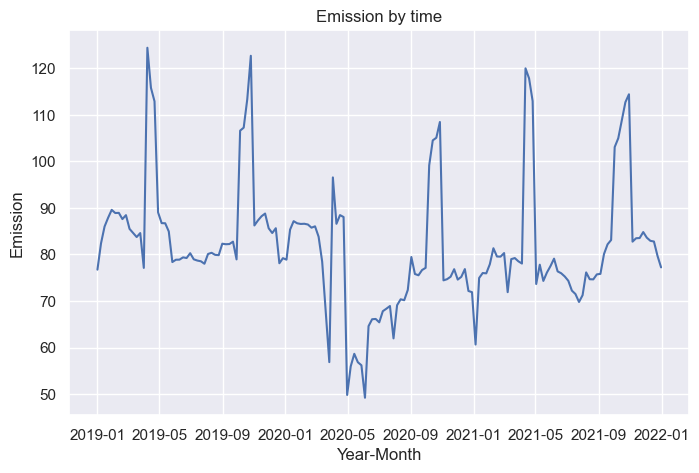

In [21]:
# Checking for seasonality
dates = pd.date_range(start = '2019-01-01', end = '2021-12-31', periods = 159)
avg_emissions_by_year_week.index = pd.to_datetime(dates)
plt.plot(avg_emissions_by_year_week['emission'])
plt.xlabel("Year-Month")
plt.ylabel("Emission")
plt.title("Emission by time")
plt.show()

Emission data seems to have a seasonality every 4 months (the distance between each peaks). So I will calculate the number of weeks in 5 months to find out what to set my period to when I do sesonal decomposition. Since a month typically has about 4.33 weeks, I multiply this by 4 to get the period: 4.33 * 4 = 17.32 (round down to 17).

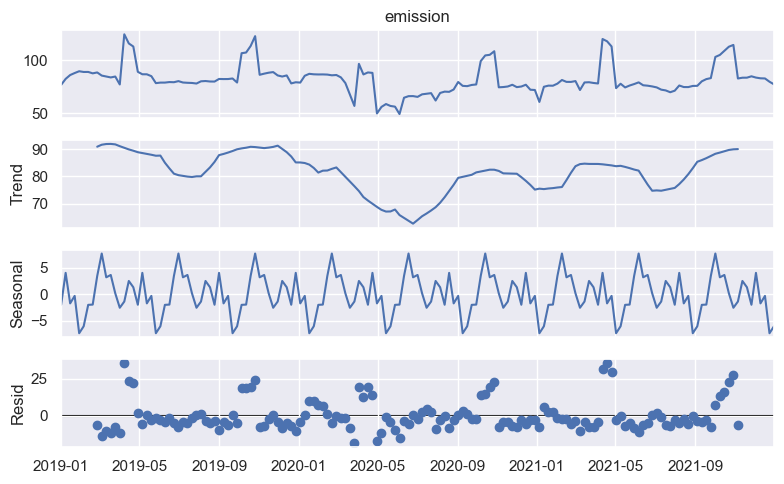

In [22]:
result = seasonal_decompose(avg_emissions_by_year_week["emission"], model = 'additive', period = 17)
result.plot()
pyplot.show()

In [23]:
# Checked for multiplicative seasonality but the errors are not centered on 0.
# result_mul = seasonal_decompose(avg_emissions_by_year_week["emission"], model = 'multiplicative', period = 17)
# result_mul.plot()
# pyplot.show()

In [24]:
# Autocorrelation (ACF) plot


#### Baseline model: Exponential Smoothing

In [38]:
# Need to redefine the avg_emissions_by_year_week to have generic indices instead of a date index
avg_emissions_by_year_week = df.groupby(["year", "week_no"])["emission"].mean()
avg_emissions_by_year_week = pd.DataFrame(avg_emissions_by_year_week)
avg_emissions_by_year_week = avg_emissions_by_year_week.reset_index() # reset the index to extract year and week_no as named columns in the df

In [39]:
# Train-test split
train = avg_emissions_by_year_week.head(len(avg_emissions_by_year_week) - 49) # because we have to predict 49 weeks out per location
test = avg_emissions_by_year_week.tail(49)

Check for AIC and BIC to choose a seasonal period

In [40]:
seasonality_2months_aic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 10).fit().aic
seasonality_3months_aic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 13).fit().aic
seasonality_4months_aic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 17).fit().aic
seasonality_5months_aic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 21).fit().aic

print("AIC comparisons")
print("seasonality_2months", seasonality_2months_aic)
print("seasonality_3months", seasonality_3months_aic)
print("seasonality_4months", seasonality_4months_aic)
print("seasonality_5months", seasonality_5months_aic)

AIC comparisons
seasonality_2months 525.3162445576864
seasonality_3months 504.56290319093046
seasonality_4months 524.4583366998827
seasonality_5months 533.6524954077694


In [41]:
seasonality_2months_bic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 10).fit().bic
seasonality_3months_bic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 13).fit().bic
seasonality_4months_bic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 17).fit().bic
seasonality_5months_bic = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 21).fit().bic

print("BIC comparisons")
print("seasonality_2months", seasonality_2months_bic)
print("seasonality_3months", seasonality_3months_bic)
print("seasonality_4months", seasonality_4months_bic)
print("seasonality_5months", seasonality_5months_bic)

BIC comparisons
seasonality_2months 557.7220089471955
seasonality_3months 545.0701086778167
seasonality_4months 575.7674636499387
seasonality_5months 595.763543820995


C:\Users\chery\AppData\Local\Temp\ipykernel_33676\3239131374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['HWES_ADD'] = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 13).fit().fittedvalues


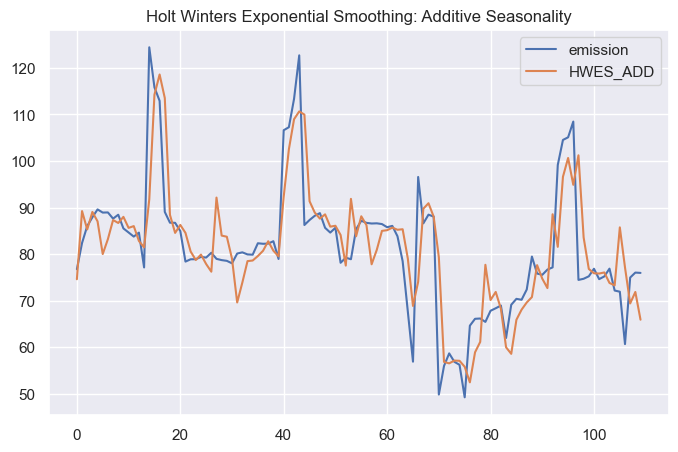

In [42]:
# ESM modeling
train['HWES_ADD'] = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 13).fit().fittedvalues
train[['emission', 'HWES_ADD']].plot(title='Holt Winters Exponential Smoothing: Additive Seasonality')
plt.show()

In [43]:
fit = ExponentialSmoothing(train['emission'], seasonal='add', seasonal_periods = 13).fit()

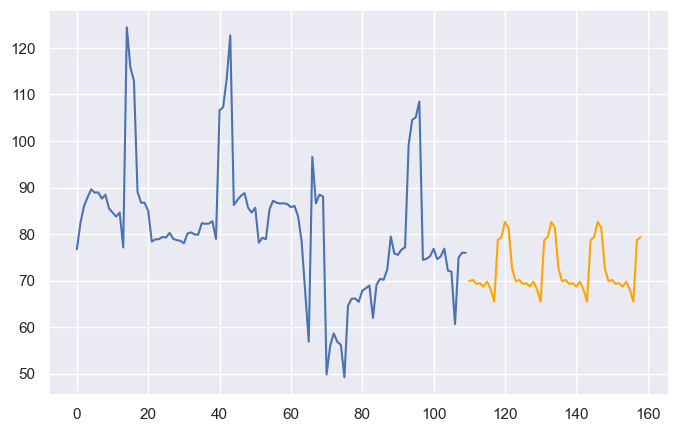

In [44]:
plt.cla()
fcast = fit.forecast(49)
ax = train['emission'].plot(figsize=(8, 5))
fcast.plot(ax = ax,color = "orange")
plt.show()

#### Geoplotting

In [45]:
# rw_gis = gpd.read_file("rw_geo.json")
# rw_gis.head()

In [46]:
# Find average emissions per location from 2019-2021
# emission_avg = df.groupby(['latitude', 'longitude'])['emission'].mean().reset_index()
# emission_avg.head()

In [47]:
# Turn the geo information of emission dataset to geometry property of the GeoDataFrame.
# geopoints = emission_avg.apply(
#     lambda srs: Point(float(srs['longitude']), float(srs['latitude'])),
#     axis='columns'
# )

# emission_avg_geocoded = gpd.GeoDataFrame(emission_avg, geometry=geopoints)
# emission_avg_geocoded.head()

In [48]:
# Check if the bounds of the geometries in the geojson and the train data overlap - THEY ARE NOT. 

# print(rw_gis.total_bounds)  # [minx, miny, maxx, maxy]
# print(emission_avg_geocoded.total_bounds)

In [49]:
# rw_map = gpl.polyplot(
#     rw_gis,
#     projection=gcrs.AlbersEqualArea(),
#     linewidth = 1,
#     figsize=(10, 8))

# # palette = sns.color_palette("viridis", as_cmap=True)
# gpl.pointplot(emission_avg_geocoded, 
#               projection=gcrs.AlbersEqualArea(),
#               hue ='emission', 
#               cmap = 'viridis',
#               legend = True, 
#               limits = (1, 50),
#               # palette = palette,
#               ax = rw_map)

In [50]:
# Plot polygons
# rw_gis.plot(figsize = (5,5))
# plt.title("Polygon Dataset")
# plt.show()

In [51]:
# Plot points
# emission_avg_geocoded.plot(figsize = (5,5))
# plt.title("Point Dataset")
# plt.show()

#### How to handle missing values (in context of problem and in context of time series data)?